In [34]:
import numpy as np
import pandas as pd
import jsonlines
import gc
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

## Write templates

In [117]:
data_dict = {
    "capital": {
        "file_name": "capital_country.csv",
        "templates": [
            "{capital} is the capital of {country}",
            "The capital of {country} is {capital}"
        ],
        "col_names": ["capital", "country"],
    },
    "city": {
        "file_name": "city_country_v2.csv",
        "templates": [
            "{city} is a city of {country}",
            "{country} has a city called {city}"
        ],
        "col_names": ["city", "country"],
    },
    "birthplace": {
        "file_name": "person_birthplace_v2.csv",
        "templates": [
            "{person} was born in {birthplace}",
            "{birthplace} is the birthplace of {person}"
        ],
        "col_names": ["person", "birthplace"],
    },
    "spouse": {
        "file_name": "spouse.csv",
        "templates": [
            "{p1} is the spouse of {p2}",
            "{p2} is the spouse of {p1}",
            "{p1} is married to {p2}",
            "{p2} is married to {p1}",
        ],
        "col_names": ["p1", "p2"],
    },
    "writing": {
        "file_name": "written_work.csv",
        "templates": [
            "{p1} authored the writing {book}",
            "{p1} authored {book}",
            "{book} is written by {p1}",
        ],
        "col_names": ["p1", "book"],
    },
}

# Clean csvs

### Capital

In [8]:
df = pd.read_csv("capital_country.csv")
df

,capital,country,capitalLabel,countryLabel
0,http://www.wikidata.org/entity/Q727,http://www.wikidata.org/entity/Q29999,Amsterdam,Kingdom of the Netherlands
1,http://www.wikidata.org/entity/Q1354,http://www.wikidata.org/entity/Q902,Dhaka,Bangladesh
2,http://www.wikidata.org/entity/Q1362,http://www.wikidata.org/entity/Q843,Islamabad,Pakistan
3,http://www.wikidata.org/entity/Q1519,http://www.wikidata.org/entity/Q878,Abu Dhabi,United Arab Emirates
4,http://www.wikidata.org/entity/Q1530,http://www.wikidata.org/entity/Q796,Baghdad,Iraq
...,...,...,...,...
163,http://www.wikidata.org/entity/Q37806,http://www.wikidata.org/entity/Q686,Port Vila,Vanuatu
164,http://www.wikidata.org/entity/Q40921,http://www.wikidata.org/entity/Q685,Honiara,Solomon Islands
165,http://www.wikidata.org/entity/Q42751,http://www.wikidata.org/entity/Q702,Palikir,Federated States of Micronesia
166,http://www.wikidata.org/entity/Q515229,http://www.wikidata.org/entity/Q695,Ngerulmud,Palau


### City

In [53]:
df = pd.read_csv("city_country.csv")
df

,city,cityLabel,country,countryLabel
0,http://www.wikidata.org/entity/Q14903,Voerde,http://www.wikidata.org/entity/Q183,Germany
1,http://www.wikidata.org/entity/Q14912,Saarlouis,http://www.wikidata.org/entity/Q183,Germany
2,http://www.wikidata.org/entity/Q14956,Wesseling,http://www.wikidata.org/entity/Q183,Germany
3,http://www.wikidata.org/entity/Q8356,Valladolid,http://www.wikidata.org/entity/Q29,Spain
4,http://www.wikidata.org/entity/Q23154,Bristol,http://www.wikidata.org/entity/Q145,United Kingdom
...,...,...,...,...
7894,http://www.wikidata.org/entity/Q2501786,Tiflet,http://www.wikidata.org/entity/Q1028,Morocco
7895,http://www.wikidata.org/entity/Q2472697,Ouro Sogui,http://www.wikidata.org/entity/Q1041,Senegal
7896,http://www.wikidata.org/entity/Q11954442,Venasa,http://www.wikidata.org/entity/Q33490,Cappadocia
7897,http://www.wikidata.org/entity/Q3809153,Michmash,http://www.wikidata.org/entity/Q219060,State of Palestine


In [21]:
cityCount = df.groupby("countryLabel").count().iloc[:,0].to_frame().sort_values("city", ascending=False)
cityCount.head(50)

,city
countryLabel,
Poland,712
India,474
Spain,335
Argentina,248
Turkey,204
Peru,192
Pakistan,177
Egypt,164
Mexico,155


In [22]:
cityCount

,city
countryLabel,
Poland,712
India,474
Spain,335
Argentina,248
Turkey,204
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


In [27]:
cityCount[cityCount["city"]==1]

,city
countryLabel,
Zimbabwe Rhodesia,1
Yuan dynasty,1
San Marino,1
Wang Jingwei regime,1
Sasanian Empire,1
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


In [29]:
cityCount[cityCount["city"]<10]

,city
countryLabel,
Guinea,9
Ukraine,9
Lesotho,9
Russia,9
Cape Verde,9
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


In [30]:
cityCount[cityCount["city"]<20]

,city
countryLabel,
Paraguay,19
Republic of Ireland,19
Somalia,19
Eritrea,19
Zambia,19
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


In [38]:
cityCount[cityCount["city"]<50]

,city
countryLabel,
Denmark,49
Kazakhstan,49
Slovenia,47
People's Republic of China,46
Algeria,46
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


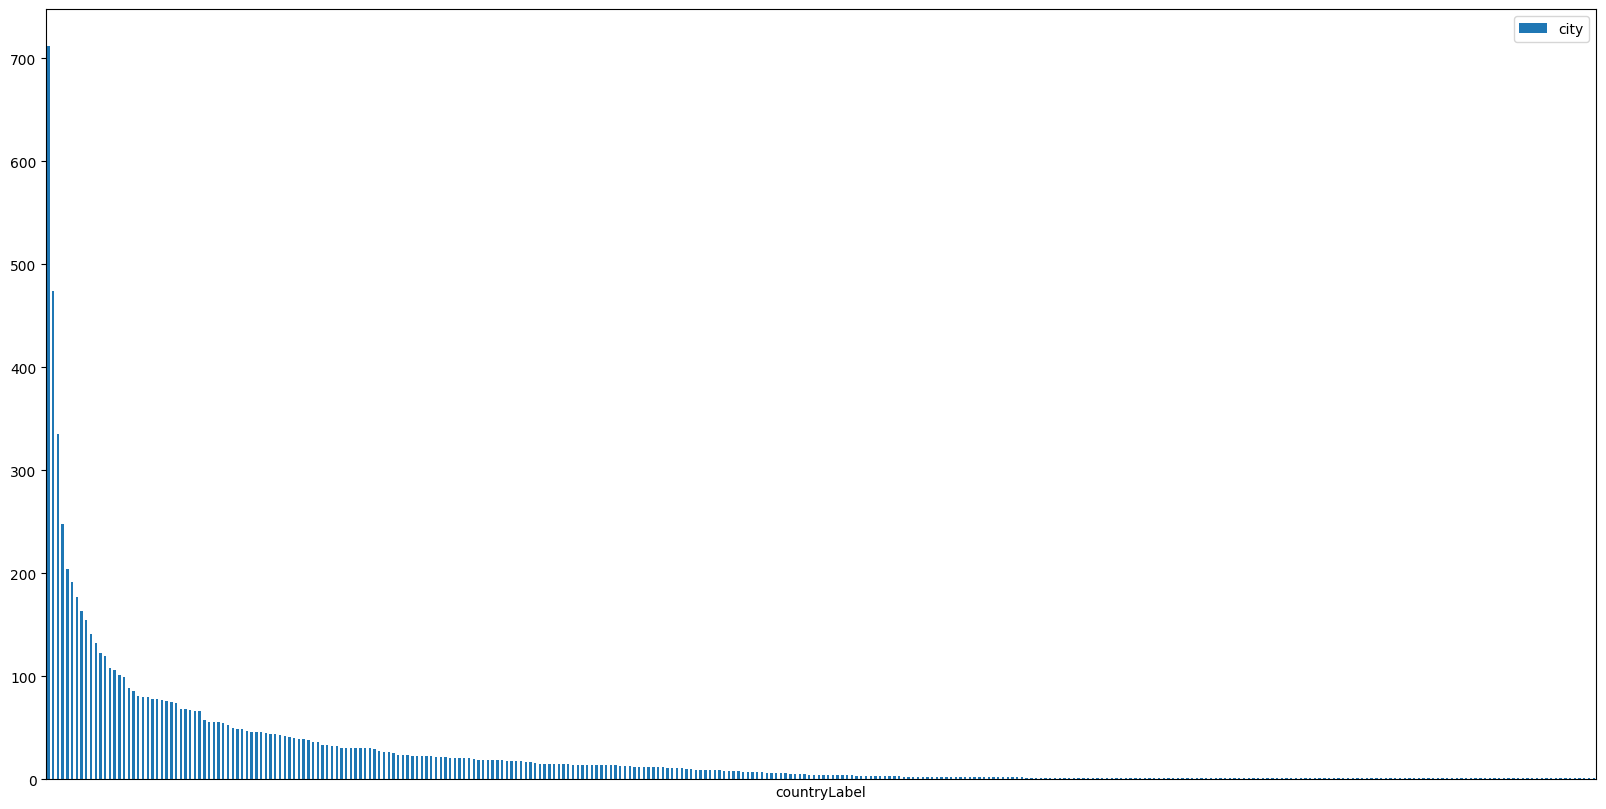

In [37]:
cityCount.plot(kind = "bar", xticks = None, figsize=(20, 10))
plt.tick_params(labelbottom = False, bottom = False)

In [54]:
## choose 10 cities per country
df_small = df.groupby(["country", "countryLabel"]).head(10)

In [55]:
df_small

,city,cityLabel,country,countryLabel
0,http://www.wikidata.org/entity/Q14903,Voerde,http://www.wikidata.org/entity/Q183,Germany
1,http://www.wikidata.org/entity/Q14912,Saarlouis,http://www.wikidata.org/entity/Q183,Germany
2,http://www.wikidata.org/entity/Q14956,Wesseling,http://www.wikidata.org/entity/Q183,Germany
3,http://www.wikidata.org/entity/Q8356,Valladolid,http://www.wikidata.org/entity/Q29,Spain
4,http://www.wikidata.org/entity/Q23154,Bristol,http://www.wikidata.org/entity/Q145,United Kingdom
...,...,...,...,...
7785,http://www.wikidata.org/entity/Q2427450,Hashtpar,http://www.wikidata.org/entity/Q794,Iran
7808,http://www.wikidata.org/entity/Q3696182,Dibba Al-Fujairah,http://www.wikidata.org/entity/Q878,United Arab Emirates
7857,http://www.wikidata.org/entity/Q12115162,Kriukiv,http://www.wikidata.org/entity/Q212,Ukraine
7896,http://www.wikidata.org/entity/Q11954442,Venasa,http://www.wikidata.org/entity/Q33490,Cappadocia


In [44]:
df_small.groupby("countryLabel").count().iloc[:,0].to_frame().sort_values("city", ascending=False)

,city
countryLabel,
Ivory Coast,10
Iceland,10
Guinea-Bissau,10
Guyana,10
Haiti,10
...,...
Mesopotamia,1
Messapia,1
Ming dynasty,1


In [56]:
df_small.to_csv("city_country_v2.csv")

### Birth Place

In [57]:
df = pd.read_csv("person_birthplace.csv")
df

,person,birthplace,personLabel,birthplaceLabel
0,http://www.wikidata.org/entity/Q11873,http://www.wikidata.org/entity/Q16,Dale Frail,Canada
1,http://www.wikidata.org/entity/Q21820,http://www.wikidata.org/entity/Q16,Shaherose Charania,Canada
2,http://www.wikidata.org/entity/Q31806,http://www.wikidata.org/entity/Q16,Sat-Okh,Canada
3,http://www.wikidata.org/entity/Q72871,http://www.wikidata.org/entity/Q16,Peter Scheerer,Canada
4,http://www.wikidata.org/entity/Q5108611,http://www.wikidata.org/entity/Q16,Chrissie Zullo,Canada
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q16633209,http://www.wikidata.org/entity/Q34,Gerald Lindberg,Sweden
19996,http://www.wikidata.org/entity/Q2370971,http://www.wikidata.org/entity/Q35,Sven Birch,Denmark
19997,http://www.wikidata.org/entity/Q2420990,http://www.wikidata.org/entity/Q35,Thietmar of Hildesheim,Denmark
19998,http://www.wikidata.org/entity/Q2460108,http://www.wikidata.org/entity/Q35,Gyda Hansen,Denmark


In [58]:
df.groupby("birthplaceLabel").count().iloc[:,0].to_frame().sort_values("person", ascending=False)

,person
birthplaceLabel,
United States of America,5396
England,4135
Scotland,1772
Japan,1500
Canada,1314
Wales,919
Sweden,914
Norway,828
Spain,772


In [59]:
## Only 19 countries came up!
df_small = df.groupby(["birthplace", "birthplaceLabel"]).head(100)

In [60]:
df_small.groupby("birthplaceLabel").count().iloc[:,0].to_frame().sort_values("person", ascending=False)

,person
birthplaceLabel,
Luxembourg,100
Belgium,100
United States of America,100
Sweden,100
Spain,100
Scotland,100
Republic of Ireland,100
Norway,100
Northern Ireland,100


In [61]:
df_small.to_csv("person_birthplace_v2.csv")

### spouse.csv

In [63]:
df = pd.read_csv("spouse.csv")
df

,p1,p1Label,p2,p2Label
0,http://www.wikidata.org/entity/Q4128,Louis Aragon,http://www.wikidata.org/entity/Q4137,Elsa Triolet
1,http://www.wikidata.org/entity/Q4137,Elsa Triolet,http://www.wikidata.org/entity/Q4128,Louis Aragon
2,http://www.wikidata.org/entity/Q68743,Hannelore Kohl,http://www.wikidata.org/entity/Q2518,Helmut Kohl
3,http://www.wikidata.org/entity/Q1407,Tiberius,http://www.wikidata.org/entity/Q2259,Julia the Elder
4,http://www.wikidata.org/entity/Q48174,Marcus Vipsanius Agrippa,http://www.wikidata.org/entity/Q2259,Julia the Elder
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q715827,Dean McDermott,http://www.wikidata.org/entity/Q229050,Tori Spelling
19996,http://www.wikidata.org/entity/Q367415,William I of Sicily,http://www.wikidata.org/entity/Q257202,Margaret of Navarre
19997,http://www.wikidata.org/entity/Q359352,Jean IV de Brosse,http://www.wikidata.org/entity/Q257557,Anne de Pisseleu d'Heilly
19998,http://www.wikidata.org/entity/Q322179,Wallace Beery,http://www.wikidata.org/entity/Q229232,Gloria Swanson


In [74]:
## how many pairs have it both ways?
df2 = df.copy()
df2["p1"] = df["p2"]
df2["p2"] = df["p1"]
df2

,p1,p1Label,p2,p2Label
0,http://www.wikidata.org/entity/Q4137,Louis Aragon,http://www.wikidata.org/entity/Q4128,Elsa Triolet
1,http://www.wikidata.org/entity/Q4128,Elsa Triolet,http://www.wikidata.org/entity/Q4137,Louis Aragon
2,http://www.wikidata.org/entity/Q2518,Hannelore Kohl,http://www.wikidata.org/entity/Q68743,Helmut Kohl
3,http://www.wikidata.org/entity/Q2259,Tiberius,http://www.wikidata.org/entity/Q1407,Julia the Elder
4,http://www.wikidata.org/entity/Q2259,Marcus Vipsanius Agrippa,http://www.wikidata.org/entity/Q48174,Julia the Elder
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q229050,Dean McDermott,http://www.wikidata.org/entity/Q715827,Tori Spelling
19996,http://www.wikidata.org/entity/Q257202,William I of Sicily,http://www.wikidata.org/entity/Q367415,Margaret of Navarre
19997,http://www.wikidata.org/entity/Q257557,Jean IV de Brosse,http://www.wikidata.org/entity/Q359352,Anne de Pisseleu d'Heilly
19998,http://www.wikidata.org/entity/Q229232,Wallace Beery,http://www.wikidata.org/entity/Q322179,Gloria Swanson


In [80]:
pairs = df[["p1", "p2"]].merge(df2[["p1", "p2"]], how="inner")
pairs.sort_values("p1")

,p1,p2
4065,http://www.wikidata.org/entity/Q1001,http://www.wikidata.org/entity/Q264908
2433,http://www.wikidata.org/entity/Q100322,http://www.wikidata.org/entity/Q124493
214,http://www.wikidata.org/entity/Q100401,http://www.wikidata.org/entity/Q58758
2205,http://www.wikidata.org/entity/Q100470,http://www.wikidata.org/entity/Q101417
1845,http://www.wikidata.org/entity/Q100765,http://www.wikidata.org/entity/Q97309
...,...,...
71,http://www.wikidata.org/entity/Q99672,http://www.wikidata.org/entity/Q2573
1417,http://www.wikidata.org/entity/Q99733,http://www.wikidata.org/entity/Q88555
432,http://www.wikidata.org/entity/Q99772,http://www.wikidata.org/entity/Q57235
1863,http://www.wikidata.org/entity/Q99893,http://www.wikidata.org/entity/Q97289


In [81]:
pairs.sort_values("p2")

,p1,p2
148,http://www.wikidata.org/entity/Q264908,http://www.wikidata.org/entity/Q1001
2128,http://www.wikidata.org/entity/Q124493,http://www.wikidata.org/entity/Q100322
1959,http://www.wikidata.org/entity/Q58758,http://www.wikidata.org/entity/Q100401
2206,http://www.wikidata.org/entity/Q101417,http://www.wikidata.org/entity/Q100470
2155,http://www.wikidata.org/entity/Q97309,http://www.wikidata.org/entity/Q100765
...,...,...
1854,http://www.wikidata.org/entity/Q2573,http://www.wikidata.org/entity/Q99672
2186,http://www.wikidata.org/entity/Q88555,http://www.wikidata.org/entity/Q99733
1909,http://www.wikidata.org/entity/Q57235,http://www.wikidata.org/entity/Q99772
2145,http://www.wikidata.org/entity/Q97289,http://www.wikidata.org/entity/Q99893


In [87]:
20000 - (4562/2)

17719.0

In [94]:
pd.concat([df, df2, df2]).drop_duplicates(["p1", "p2"], keep=False)

,p1,p1Label,p2,p2Label
15,http://www.wikidata.org/entity/Q43044,Demi Moore,http://www.wikidata.org/entity/Q2680,Bruce Willis
79,http://www.wikidata.org/entity/Q235177,Cécilia Attias,http://www.wikidata.org/entity/Q329,Nicolas Sarkozy
82,http://www.wikidata.org/entity/Q467646,Jane Franklin,http://www.wikidata.org/entity/Q2655,John Franklin
83,http://www.wikidata.org/entity/Q529601,Eleanor Anne Porden,http://www.wikidata.org/entity/Q2655,John Franklin
94,http://www.wikidata.org/entity/Q508871,Mary Sweeney,http://www.wikidata.org/entity/Q2071,David Lynch
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q715827,Dean McDermott,http://www.wikidata.org/entity/Q229050,Tori Spelling
19996,http://www.wikidata.org/entity/Q367415,William I of Sicily,http://www.wikidata.org/entity/Q257202,Margaret of Navarre
19997,http://www.wikidata.org/entity/Q359352,Jean IV de Brosse,http://www.wikidata.org/entity/Q257557,Anne de Pisseleu d'Heilly
19998,http://www.wikidata.org/entity/Q322179,Wallace Beery,http://www.wikidata.org/entity/Q229232,Gloria Swanson


In [95]:
## remove pairs that had triples from both sides (ideally I should keep onw of those but i have enough data)
df = pd.concat([df, pairs, pairs]).drop_duplicates(["p1", "p2"], keep=False)
df

,p1,p1Label,p2,p2Label
15,http://www.wikidata.org/entity/Q43044,Demi Moore,http://www.wikidata.org/entity/Q2680,Bruce Willis
79,http://www.wikidata.org/entity/Q235177,Cécilia Attias,http://www.wikidata.org/entity/Q329,Nicolas Sarkozy
82,http://www.wikidata.org/entity/Q467646,Jane Franklin,http://www.wikidata.org/entity/Q2655,John Franklin
83,http://www.wikidata.org/entity/Q529601,Eleanor Anne Porden,http://www.wikidata.org/entity/Q2655,John Franklin
94,http://www.wikidata.org/entity/Q508871,Mary Sweeney,http://www.wikidata.org/entity/Q2071,David Lynch
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q715827,Dean McDermott,http://www.wikidata.org/entity/Q229050,Tori Spelling
19996,http://www.wikidata.org/entity/Q367415,William I of Sicily,http://www.wikidata.org/entity/Q257202,Margaret of Navarre
19997,http://www.wikidata.org/entity/Q359352,Jean IV de Brosse,http://www.wikidata.org/entity/Q257557,Anne de Pisseleu d'Heilly
19998,http://www.wikidata.org/entity/Q322179,Wallace Beery,http://www.wikidata.org/entity/Q229232,Gloria Swanson


In [98]:
df.groupby("p2Label").count().iloc[:,0].to_frame().sort_values("p1", ascending=False).head(50)

,p1
p2Label,
Qianlong Emperor,28
Abdülmecid I,20
Kangxi Emperor,18
Tokugawa Ieyasu,16
Emperor Yang of Sui,13
Emperor Shengzong of Liao,13
Abdul Hamid II,13
Toyotomi Hideyoshi,12
Chulalongkorn,12


In [99]:
df.groupby("p2Label").count().iloc[:,0].to_frame().sort_values("p1", ascending=False).iloc[50:100]

,p1
p2Label,
Emperor Shenzong of Song,6
Jiajing Emperor of Ming,6
Umar ibn Al-Khattāb,6
Pepi II,6
Tenji,6
Norodom Sihanouk,5
Ginger Rogers,5
Ashoka,5
Husayn ibn Ali,5


In [100]:
## be careful when evaluatin the model on this
## the mode might output the name of a different spouse we dont know of

## so we decided to keep all spouse list as found in wikidata

### Written work

In [101]:
df = pd.read_csv("written_work.csv")
df

,p1,p1Label,book,bookLabel
0,http://www.wikidata.org/entity/Q6527,Jean-Jacques Rousseau,http://www.wikidata.org/entity/Q152070,Narcissus
1,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139879,Dona Flor and Her Two Husbands
2,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139894,Shepherds of the Night
3,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139957,Home Is the Sailor
4,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q140000,Tent of Miracles
...,...,...,...,...
19995,http://www.wikidata.org/entity/Q76449827,Jim Hewitt,http://www.wikidata.org/entity/Q70691266,"Queen Street Primary School, Queen Street, Abe..."
19996,http://www.wikidata.org/entity/Q76449837,Huw Watkins,http://www.wikidata.org/entity/Q70691291,"Raglan Voluntary Controlled Primary School, Ch..."
19997,http://www.wikidata.org/entity/Q76449825,Robert Stuart Wormleighton,http://www.wikidata.org/entity/Q70691398,"Rhiw Syr Dafydd Primary School, Maes y Garn Ro..."
19998,http://www.wikidata.org/entity/Q76449834,Carolyn Jane Thomas,http://www.wikidata.org/entity/Q70691416,"Rhos Primary School, Neath Road, Rhos, Swansea..."


In [105]:
authors = df.groupby("p1Label").count().iloc[:,0].to_frame().sort_values("p1", ascending=False)
authors

,p1
p1Label,
Georges Simenon,110
Honoré de Balzac,63
Mary Dyas,49
Rex Stout,47
Aristotle,44
...,...
John Franklin,1
John Foxe,1
Charles Spurgeon,1


In [106]:
authors.head(50)

,p1
p1Label,
Georges Simenon,110
Honoré de Balzac,63
Mary Dyas,49
Rex Stout,47
Aristotle,44
Terry Pratchett,40
Cicero,38
James Patterson,38
Jean-Marie Gustave Le Clézio,38


In [108]:
df.groupby("bookLabel").count().iloc[:,0].to_frame().sort_values("p1", ascending=False).head(50)

,p1
bookLabel,
La arto labori kune : festlibro por Humphrey Tonkin,86
Archäologenbildnisse,45
The Fate of Fenella,24
America,13
Against Sadomasochism,13
The Whole Family,12
Encyclopédie,12
Энцыклапедыя беларускай папулярнай музыкі,11
American Independents: Eighteen Color Photographers,9


In [109]:
## we also have to keep all book/author data
## when evaluatin need to check all the authors list for each book

## Create final dataset

In [112]:
for k,v in data_dict.items():
    file = v["file_name"]
    df = pd.read_csv(file)
    display(df.head())

,capital,country,capitalLabel,countryLabel
0,http://www.wikidata.org/entity/Q727,http://www.wikidata.org/entity/Q29999,Amsterdam,Kingdom of the Netherlands
1,http://www.wikidata.org/entity/Q1354,http://www.wikidata.org/entity/Q902,Dhaka,Bangladesh
2,http://www.wikidata.org/entity/Q1362,http://www.wikidata.org/entity/Q843,Islamabad,Pakistan
3,http://www.wikidata.org/entity/Q1519,http://www.wikidata.org/entity/Q878,Abu Dhabi,United Arab Emirates
4,http://www.wikidata.org/entity/Q1530,http://www.wikidata.org/entity/Q796,Baghdad,Iraq


,Unnamed: 0,city,cityLabel,country,countryLabel
0,0,http://www.wikidata.org/entity/Q14903,Voerde,http://www.wikidata.org/entity/Q183,Germany
1,1,http://www.wikidata.org/entity/Q14912,Saarlouis,http://www.wikidata.org/entity/Q183,Germany
2,2,http://www.wikidata.org/entity/Q14956,Wesseling,http://www.wikidata.org/entity/Q183,Germany
3,3,http://www.wikidata.org/entity/Q8356,Valladolid,http://www.wikidata.org/entity/Q29,Spain
4,4,http://www.wikidata.org/entity/Q23154,Bristol,http://www.wikidata.org/entity/Q145,United Kingdom


,Unnamed: 0,person,birthplace,personLabel,birthplaceLabel
0,0,http://www.wikidata.org/entity/Q11873,http://www.wikidata.org/entity/Q16,Dale Frail,Canada
1,1,http://www.wikidata.org/entity/Q21820,http://www.wikidata.org/entity/Q16,Shaherose Charania,Canada
2,2,http://www.wikidata.org/entity/Q31806,http://www.wikidata.org/entity/Q16,Sat-Okh,Canada
3,3,http://www.wikidata.org/entity/Q72871,http://www.wikidata.org/entity/Q16,Peter Scheerer,Canada
4,4,http://www.wikidata.org/entity/Q5108611,http://www.wikidata.org/entity/Q16,Chrissie Zullo,Canada


,p1,p1Label,p2,p2Label
0,http://www.wikidata.org/entity/Q4128,Louis Aragon,http://www.wikidata.org/entity/Q4137,Elsa Triolet
1,http://www.wikidata.org/entity/Q4137,Elsa Triolet,http://www.wikidata.org/entity/Q4128,Louis Aragon
2,http://www.wikidata.org/entity/Q68743,Hannelore Kohl,http://www.wikidata.org/entity/Q2518,Helmut Kohl
3,http://www.wikidata.org/entity/Q1407,Tiberius,http://www.wikidata.org/entity/Q2259,Julia the Elder
4,http://www.wikidata.org/entity/Q48174,Marcus Vipsanius Agrippa,http://www.wikidata.org/entity/Q2259,Julia the Elder


,p1,p1Label,book,bookLabel
0,http://www.wikidata.org/entity/Q6527,Jean-Jacques Rousseau,http://www.wikidata.org/entity/Q152070,Narcissus
1,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139879,Dona Flor and Her Two Husbands
2,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139894,Shepherds of the Night
3,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q139957,Home Is the Sailor
4,http://www.wikidata.org/entity/Q184440,Jorge Amado,http://www.wikidata.org/entity/Q140000,Tent of Miracles


In [123]:
for k,v in data_dict.items():
    file = v["file_name"]
    df = pd.read_csv(file)
    col_names = v["col_names"]
    templates = v["templates"]
    
    ## select 100 random samples for each type of sentence
    for _, row in df.sample(frac=1).head(100).iterrows():
        ## generate sent
        ## tokenize it
        ## align kg embedding and mask
        ## create dataset

capital         http://www.wikidata.org/entity/Q37701
country           http://www.wikidata.org/entity/Q258
capitalLabel                             Bloemfontein
countryLabel                             South Africa
Name: 162, dtype: object
capital         http://www.wikidata.org/entity/Q649
country         http://www.wikidata.org/entity/Q159
capitalLabel                                 Moscow
countryLabel                                 Russia
Name: 109, dtype: object
capital         http://www.wikidata.org/entity/Q9361
country          http://www.wikidata.org/entity/Q813
capitalLabel                                 Bishkek
countryLabel                              Kyrgyzstan
Name: 59, dtype: object
capital         http://www.wikidata.org/entity/Q41699
country           http://www.wikidata.org/entity/Q760
capitalLabel                                 Castries
countryLabel                              Saint Lucia
Name: 92, dtype: object
capital         http://www.wikidata.org/entity/Q92